<a href="https://colab.research.google.com/github/maronga/Week-9-IP/blob/main/Titanic%20Survival%20Prediction/Copy_of_%22Moringa_Data_Science_Core_W9_Independent_Python_Project_2022_02_25_John_Maronga_Python_Notebook_Dataset_1%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Titanic Survival Rate

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Predicting the survivability in the Titanic dataset

### b) Defining the Metric for Success

The model is considered successfull if

### c) Understanding the context 

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Variable      	Definition       	Key

survival      Survival        0 = No, 1 = Yes

pclass	      Ticket class	  1 = 1st, 2 = 2nd, 3 = 3rd

sex	          Sex	

Age        	 Age in years	

sibsp	       # of siblings / spouses aboard the Titanic

parch	       # of parents / children aboard the Titanic	

ticket	     Ticket number	

fare	       Passenger fare	

cabin	       Cabin number	

embarked	   Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [167]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [168]:
# Loading the test dataset from the source
# ---
# Dataset source = Dataset source = http://bit.ly/DiabetesDataSource
# ---
#
#url='https://raw.githubusercontent.com/maronga/Week-9-IP/main/Titanic%20Survival%20Prediction/test%20(1).csv'
#test=pd.read_csv(url)
test=pd.read_csv('/content/test (1).csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [169]:
# Loading the train dataset from the source
# ---
# Dataset source = Dataset source = http://bit.ly/DiabetesDataSource
# ---
#
#url='https://raw.githubusercontent.com/maronga/Week-9-IP/main/Titanic%20Survival%20Prediction/train%20(5).csv'
#train=pd.read_csv(url)
train=pd.read_csv('/content/train (5).csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




## 3. Checking the Data

Test set

In [170]:
# Determining the no. of records in our dataset
#
test.value_counts()

PassengerId  Pclass  Name                                           Sex     Age   SibSp  Parch  Ticket    Fare      Cabin    Embarked
904          1       Snyder, Mrs. John Pillsbury (Nelle Stevenson)  female  23.0  1      0      21228     82.2667   B45      S           1
1164         1       Clark, Mrs. Walter Miller (Virginia McDowell)  female  26.0  1      0      13508     136.7792  C89      C           1
1213         3       Krekorian, Mr. Neshan                          male    25.0  0      0      2654      7.2292    F E57    C           1
1208         1       Spencer, Mr. William Augustus                  male    57.0  1      0      PC 17569  146.5208  B78      C           1
1206         1       White, Mrs. John Stuart (Ella Holmes)          female  55.0  0      0      PC 17760  135.6333  C32      C           1
                                                                                                                                        ..
1009         3       Sandstrom, 

Observation: The test dataset has 87 records

In [171]:
# Previewing the top 10 rows of our dataset
#
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [172]:
# Previewing the bottom 10 rows of our dataset
# 
test.tail(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [173]:
test.shape

(418, 11)

Observation: The dataset has 418 rows and 11 columns

In [174]:
# Checking whether each column has an appropriate datatype
#
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Observation: The columns have the appropriate datatypes

Train Set

In [175]:
# Determining the no. of records in our dataset
#
train.value_counts

<bound method DataFrame.value_counts of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

In [176]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Observation: 549 people died while 342 people survived

In [177]:
# Previewing the top 10 rows of our dataset
#
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [178]:
# Previewing the bottom 10 rows of our dataset
# 
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [179]:
# Checking the data types in the train set
#
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [180]:
# Checking the shape of the train dataset
train.shape

(891, 12)

Observation: The train dataset has 891 rows and 12 columns

In [181]:
# Checking the train dataset columns
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [182]:
# Checking for unique values in the train dataset
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Observation: The survived and sex columns only have two values, hence they are binary, which is correct

In [183]:
# Checking for unique values in the Passenger Column
train['PassengerId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

Observation: The Passenger ID column only contains number count of the passengers, hence it can be dropped 

In [184]:
# Dropping the PassengerId column
train.drop([ 'PassengerId'], axis=1, inplace=True)

In [185]:
# Checking if the PassengerId column has been dropped
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Observation: The PassengerId column has been dropped

## 4. External Data Source Validation

### a.Validation

Observation: There are no duplicated values in the dataset

In [186]:
# Checking for duplicates
#
train.duplicated().sum()

0

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

# 5. Data Cleaning

In [187]:
# Checking for null values in the train dataset
#
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Observation: the age column has 177 null values, cabin has alot of null values and the embarked has only 2 null values

In [188]:
# Checking the % of null values in the train dataset
#
#Data Cleaning Action: Checking percentage of the missing values
train.isna().mean().round(4) * 100


Survived     0.00
Pclass       0.00
Name         0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Ticket       0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64

Observation: The Cabin column has more than 75% of its columns with missing values.

In [189]:
# Chekcing for unique values in the Cabin column
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Observation: The cabin column has many unique values which are not in numerical form and it is hard to estimate, more over, the missing values account for more than 75%

In [190]:
# Dropping the Cabin column 
#
train.drop([ 'Cabin'], axis=1, inplace=True)

In [191]:
# Checking if the Cabin column has been dropped
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Observation: The Cabin column has been dropped

In [192]:
# Checking for unique values in the age column
train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [193]:
#
df=train[['Age','SibSp','Pclass']]
df

,Age,SibSp,Pclass
0,22.0,1,3
1,38.0,1,1
2,26.0,0,3
3,35.0,1,1
4,35.0,0,3
...,...,...,...
886,27.0,0,2
887,19.0,0,1
888,NaN,1,3
889,26.0,0,1


In [194]:
# Extracting a title from each name in the train dataset
# we are using the Regex: [A-Za-z]+).. which looks for strings which lie between A-Z or a-z and followed by a .(dot). 
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train['Title'], train['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Onservation: There are some misspelled words like MMe and Mle

In [195]:
#Replacing the title names
train['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [196]:
# Checking the average age based by initials
train.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [197]:
# Assigning the missing values with the cell values of the mean ages
train.loc[(train.Age.isnull())&(train.Title=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Title=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Title=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Title=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Title=='Other'),'Age']=46

In [198]:
# Checking for missing values in the train dataset
train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
Title       0
dtype: int64

Observation: The embarked column still has missing values

In [199]:
# Dropping the missing values in the embarked column
train.dropna(subset=['Embarked'], inplace=True)

In [200]:
train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Title       0
dtype: int64

Observation: The missing values in the embarked have been dropped

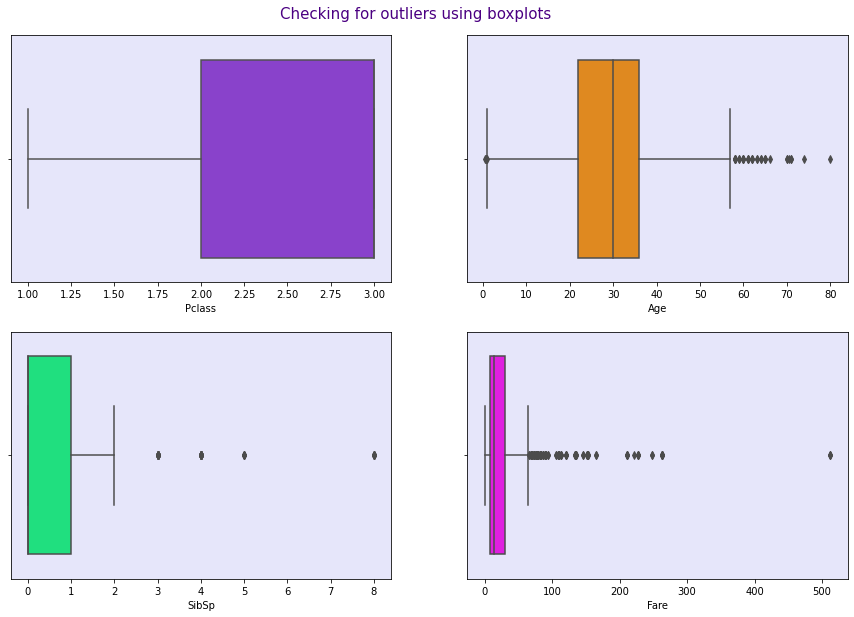

In [201]:
# Checking for outliers
#
# Creating a list of columns to check for outliers
# Creating a list of colors
#
#col_list = ['Pclass', 'Age', 'SibSp', 'Parch','Fare']
col_list = ['Pclass', 'Age', 'SibSp','Fare']
colors = ['blueviolet', 'darkorange', 'springgreen', 'fuchsia','red']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), train, col_list, colors):
  sns.boxplot(train[column], ax = ax, color = color)
  ax.set_facecolor('lavender') # Setting the background color to lavender

Observation: Outliers are present in the dataset

## 6. Exploratory Analysis

In [202]:
# Checking for basic statistical data
#
train.describe() 

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.796592,0.524184,0.382452,32.096681
std,0.486260,0.834700,13.249702,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


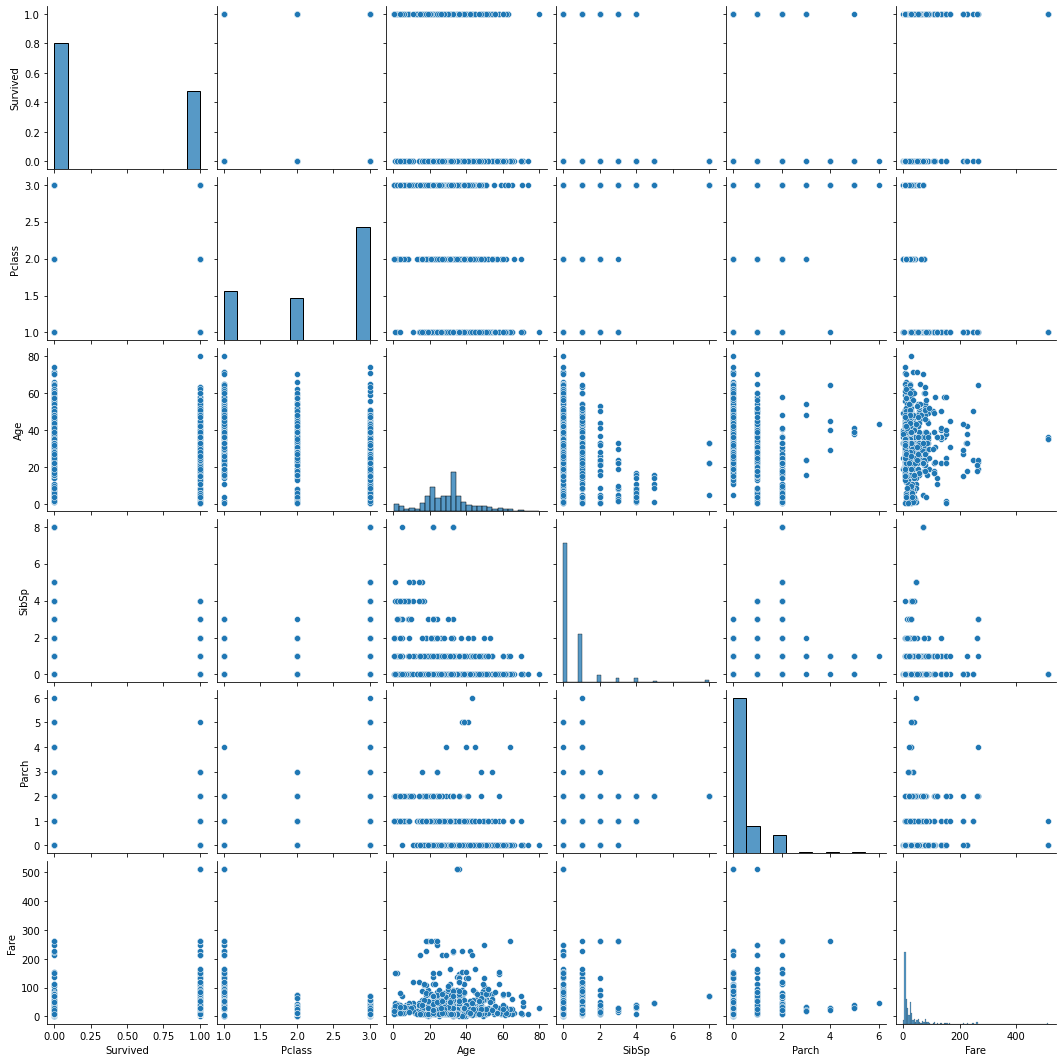

In [203]:
#plotting the scatter plots for my dataset 
#below shows the scatter plots and histograms of all the numerical variables in the data set
sns.pairplot(train)

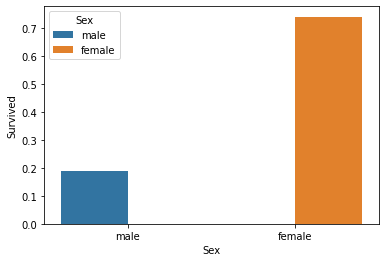

In [204]:
# Ploting the bivariate summaries and recording our observations
#
sns.barplot(x='Sex', y='Survived',data=train, hue='Sex',ci=0)
plt.show()
#


Observation: Females are more likely to survive

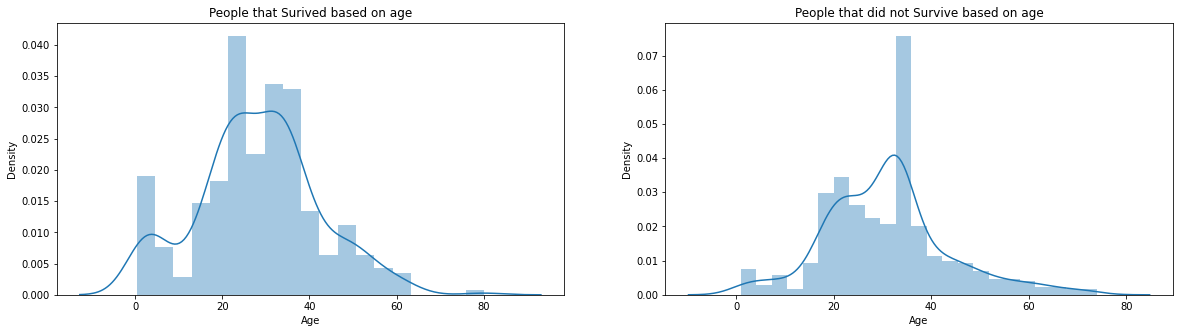

In [205]:
# Distribution plot of those who survived and those who didn't base on age
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.distplot(train[train['Survived']==1].Age,ax=ax[0])
ax[0].set_title('People that Surived based on age')
sns.distplot(train[train['Survived']==0].Age,ax=ax[1])
ax[1].set_title('People that did not Survive based on age')
plt.show()


Observation: Elderly people perished more as compared to younger people

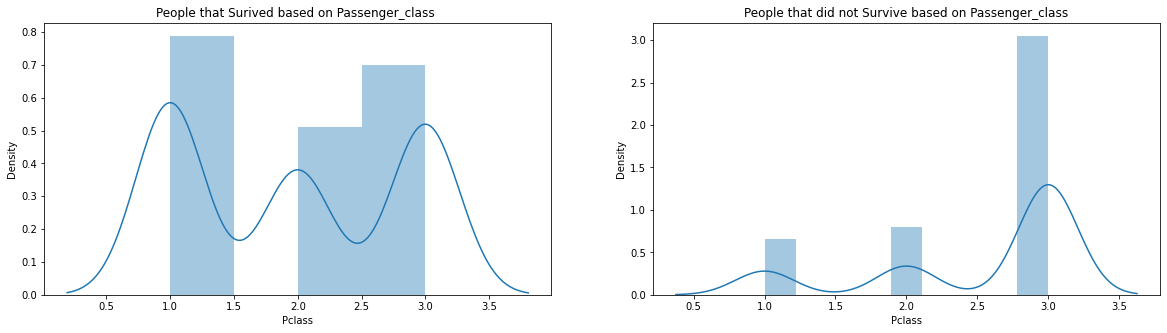

In [206]:
# Distribution plot of those who survived and those who didn't base on passenger class
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.distplot(train[train['Survived']==1].Pclass,ax=ax[0])
ax[0].set_title('People that Surived based on Passenger_class ')
sns.distplot(train[train['Survived']==0].Pclass,ax=ax[1])
ax[1].set_title('People that did not Survive based on Passenger_class')
plt.show()

Observation: People with first class ticket class were more likely to survive and people with third class ticket class were more likely not to survive


**Summarized observation of all features**

Women were more likely to survive as compared to men, this might be because men tried saving other passengers

1st class passenger class had a higher chance of survival as compared to the other two classes

Children 1-10 had a higher chance of survival

**Correlation between the features**

In [207]:
# Checking for correlation between the columns
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.096338,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.336341,0.081656,0.016824,-0.548193
Age,-0.096338,-0.336341,1.000000,-0.267120,-0.197840,0.086192
SibSp,-0.034040,0.081656,-0.267120,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.197840,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.086192,0.160887,0.217532,1.000000


Observation: The columns are not strongly correlated

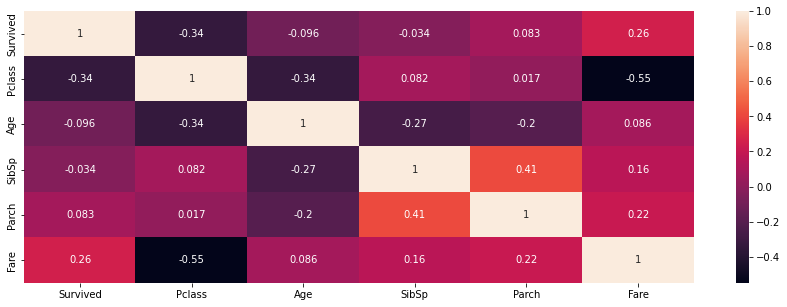

In [208]:
# Plotting a correlation heatmap
#Correlation 
plt.figure(figsize=(15,5))
sns.heatmap(train.corr(),annot=True)
plt.show()

Observation: The columns are not strongly correlated. The highest correlation is between SibSp and Parch, which is 0.41

## 7. Implementing the Solution

**Feature Engineering**

***Age_Group***

In [209]:
# Group the age column into bins thus convert them from continous to categorical
train['Age'].max()
#The maximum age is 80, I'll divide the age range 0-80 into 5 bins
train['Age_group']=0
train.loc[train['Age']<=16,'Age_group']=0
train.loc[(train['Age']>16)&(train['Age']<=32),'Age_group']=1
train.loc[(train['Age']>32)&(train['Age']<=48),'Age_group']=2
train.loc[(train['Age']>48)&(train['Age']<=64),'Age_group']=3
train.loc[train['Age']>64,'Age_group']=4
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,2


In [210]:
# Checking the value counts in the Age_group column
train['Age_group'].value_counts()

1    382
2    324
0    104
3     68
4     11
Name: Age_group, dtype: int64

***Fare_Range***

In [211]:
# Convert the fare column from a continous feature into ordinal value using pandas.qcut
train['Fare_Range']=pd.qcut(train['Fare'],4)
train.groupby(['Fare_Range'])['Survived'].mean()

Fare_Range
(-0.001, 7.896]    0.197309
(7.896, 14.454]    0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.577273
Name: Survived, dtype: float64

In [212]:
# Convert the fare_range into categorical 
train['Fare_cat']=0
train.loc[train['Fare']<=7.91,'Fare_cat']=0
train.loc[(train['Fare']>7.91)&(train['Fare']<=14.454),'Fare_cat']=1
train.loc[(train['Fare']>14.454)&(train['Fare']<=31),'Fare_cat']=2
train.loc[(train['Fare']>31)&(train['Fare']<=513),'Fare_cat']=3

***Converting String values into numeric***

In [213]:
train['Sex'].replace(['male','female'],[0,1],inplace=True)
train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
train['Title'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

***Dropping Not needed features***

In [214]:
train.drop(['Name','Age','Ticket','Fare','Fare_Range'],axis=1,inplace=True)

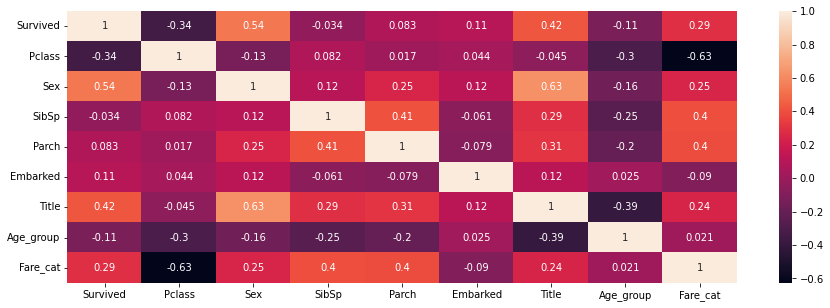

In [215]:
# Correlation heatma[]
plt.figure(figsize=(15,5))
sns.heatmap(train.corr(),annot=True)
plt.show()

Observation: Some features are positively correlated while others are not

**Prediction**

In [217]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_group,Fare_cat
0,0,3,0,1,0,0,0,1,0
1,1,1,1,1,0,1,1,2,3
2,1,3,1,0,0,0,2,1,1
3,1,1,1,1,0,0,1,2,3
4,0,3,0,0,0,0,0,2,1


**Baseline Model**

In [219]:
#Create your dependent and independent variable 
y = train[["Survived"]]
X = train.drop(["Survived"],axis=1)


In [220]:
#Split the data into test set and training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state =50)

In [222]:
#Feature Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#We shall normalise the data within a particular range
#Sometimes, it also helps in speeding up the calculations in an algorithm.

In [223]:
 #Create the model
 from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [224]:
#Predict the model that we have created 
#We use the test to predict
y_pred = classifier.predict(X_test)

In [225]:
#Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8033707865168539
[[101  11]
 [ 24  42]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       112
           1       0.79      0.64      0.71        66

    accuracy                           0.80       178
   macro avg       0.80      0.77      0.78       178
weighted avg       0.80      0.80      0.80       178



Observation: I achieved an accuracy score of 80%

**Second Model**

In [226]:
#Create your dependent and independent variable 
y = train[["Survived"]]
X = train.drop(["Survived"],axis=1)


In [227]:
#Split the data into test set and training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state =50)

In [228]:
#Feature Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#We shall normalise the data within a particular range
#Sometimes, it also helps in speeding up the calculations in an algorithm.

In [229]:
 #Create the model
 from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [230]:
#Predict the model that we have created 
#We use the test to predict
y_pred = classifier.predict(X_test)

In [231]:
#Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8127340823970037
[[143  20]
 [ 30  74]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       163
           1       0.79      0.71      0.75       104

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



Observation: The second model produced an accuracy score of 79%

**Third Model**

In [232]:
#Create your dependent and independent variable 
y = train[["Survived"]]
X = train.drop(["Survived"],axis=1)


In [233]:
#Split the data into test set and training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,random_state =50)

In [234]:
#Feature Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#We shall normalise the data within a particular range
#Sometimes, it also helps in speeding up the calculations in an algorithm.

In [235]:
 #Create the model
 from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [236]:
#Predict the model that we have created 
#We use the test to predict
y_pred = classifier.predict(X_test)

In [237]:
#Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8146067415730337
[[196  24]
 [ 42  94]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       220
           1       0.80      0.69      0.74       136

    accuracy                           0.81       356
   macro avg       0.81      0.79      0.80       356
weighted avg       0.81      0.81      0.81       356



Observation: The third model achieved an accuracy score of 80%

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [216]:
# Reviewing the Solution 
#

## 9. Follow up questions

What type of material was the ship made of

What activities were taking place during the time of incident



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?